In [1]:
import pandas as pd
import datetime as dt
import pandas_datareader.data as pdr
import os
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.varmax import VARMAX
from darts.models import VARIMA
import math

: 

In [ ]:
yf.pdr_override()
y_symbols = ['AAPL', 'GOOG', 'AMZN', 'TSLA', 'MSFT']

In [4]:
startdate = dt.datetime(2015,1,1)
enddate = dt.datetime(2021,1, 1)

In [5]:
data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)

[*********************100%%**********************]  5 of 5 completed


In [6]:
data.head()

Adj Close                                                Close   
                 AAPL     AMZN       GOOG       MSFT       TSLA       AAPL   
Date                                                                         
2015-01-02  24.498688  15.4260  26.168653  40.534847  14.620667  27.332500  \
2015-01-05  23.808512  15.1095  25.623152  40.162086  14.006000  26.562500   
2015-01-06  23.810759  14.7645  25.029282  39.572613  14.085333  26.565001   
2015-01-07  24.144632  14.9210  24.986401  40.075409  14.063333  26.937500   
2015-01-08  25.072321  15.0230  25.065184  41.254356  14.041333  27.972500   

                                                      ...       Open            
               AMZN       GOOG       MSFT       TSLA  ...       AAPL     AMZN   
Date                                                  ...                       
2015-01-02  15.4260  26.168653  46.759998  14.620667  ...  27.847500  15.6290  \
2015-01-05  15.1095  25.623152  46.330002  14.006000  ...  27.072500  15.3505   
2015-01-06  14.7645  25.029282  45.650002  14.085333  ...  26.635000  15.1120   
2015-01-07  14.9210  24.986401  46.230000  14.063333  ...  26.799999  14.8750   
2015-01-08  15.0230  25.065184  47.590000  14.041333  ...  27.307501  15.0160   

                                                Volume                       
                 GOOG       MSFT       TSLA       AAPL      AMZN      GOOG   
Date                                                                         
2015-01-02  26.378078  46.660000  14.858000  212818400  55664000  28951268  \
2015-01-05  26.091366  46.369999  14.303333  257142000  55484000  41196796   
2015-01-06  25.679497  46.380001  14.004000  263188400  70380000  57998800   
2015-01-07  25.280592  45.980000  14.223333  160423600  52806000  41301082   
2015-01-08  24.831326  46.750000  14.187333  237458000  61768000  67071641   

                                
                MSFT      TSLA  
Date                            
2015-01-02  27913900  71466000  
2015-01-05  39673900  80527500  
2015-01-06  36447900  93928500  
2015-01-07  29114100  44526000  
2015-01-08  29645200  51637500  

[5 rows x 30 columns]

Text(0.5, 1.0, 'Stock prices')

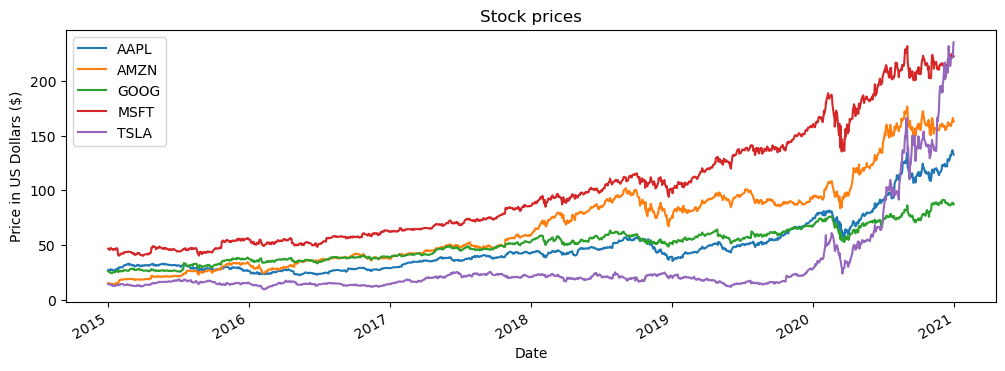

In [7]:
data.Close.plot(figsize = (12, 4))
plt.xlabel('Date')
plt.ylabel('Price in US Dollars ($)')
plt.title('Stock prices')

Most of the variation seems to happen between 2020 and 2021. Lets take a closer look

<Axes: xlabel='Date'>

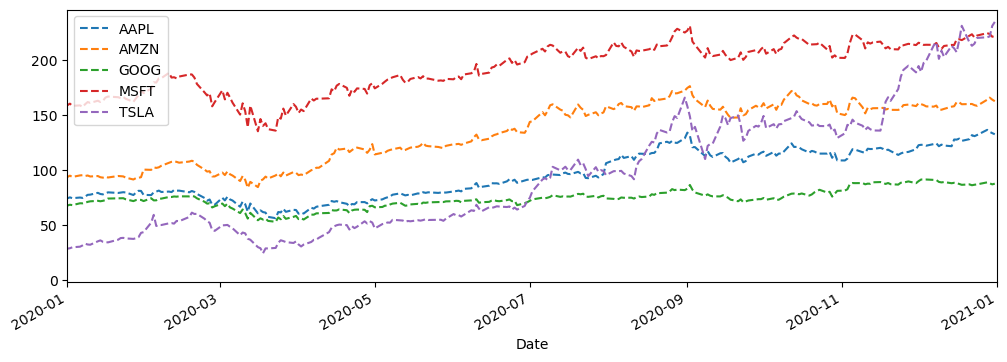

In [8]:
data.Close.plot(xlim = ['2020-01-01', '2021-01-01'], ls = '--', figsize = (12, 4))

[*********************100%%**********************]  1 of 1 completed


Text(0, 0.5, 'Prices')

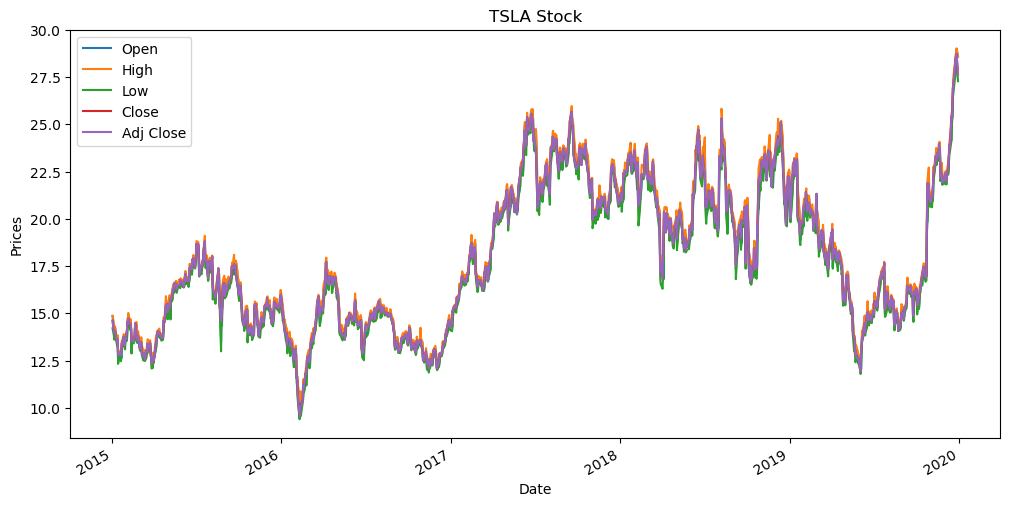

In [9]:
data = pdr.get_data_yahoo(['TSLA'], start='2015-01-01', end='2019-12-31')
data.iloc[:, :-1].plot(figsize = (12, 6))
plt.title('TSLA Stock')
plt.ylabel('Prices')

### ANALYZE GOOGLE STOCK

In [10]:
data = pdr.get_data_yahoo(['GOOG'], start='2015-01-01', end='2019-12-31')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26.378078,26.490770,26.133251,26.168653,26.168653,28951268
2015-01-05,26.091366,26.144720,25.582764,25.623152,25.623152,41196796
2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800
2015-01-07,25.280592,25.292759,24.914099,24.986401,24.986401,41301082
2015-01-08,24.831326,25.105074,24.482782,25.065184,25.065184,67071641


In [11]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,45.649916,46.038350,45.260461,45.663827,45.663827,3.415121e+07
std,11.523511,11.629350,11.441770,11.539933,11.539933,1.697418e+07
min,24.664783,24.730902,24.311253,24.560070,24.560070,6.950000e+06
25%,36.463501,36.737000,36.116798,36.448002,36.448002,2.426200e+07
50%,46.477001,46.694000,46.172249,46.467999,46.467999,2.976400e+07
75%,55.632999,56.210999,55.183250,55.756500,55.756500,3.899600e+07
max,68.167503,68.250000,67.633499,68.058502,68.058502,2.232980e+08


<Axes: xlabel='Date'>

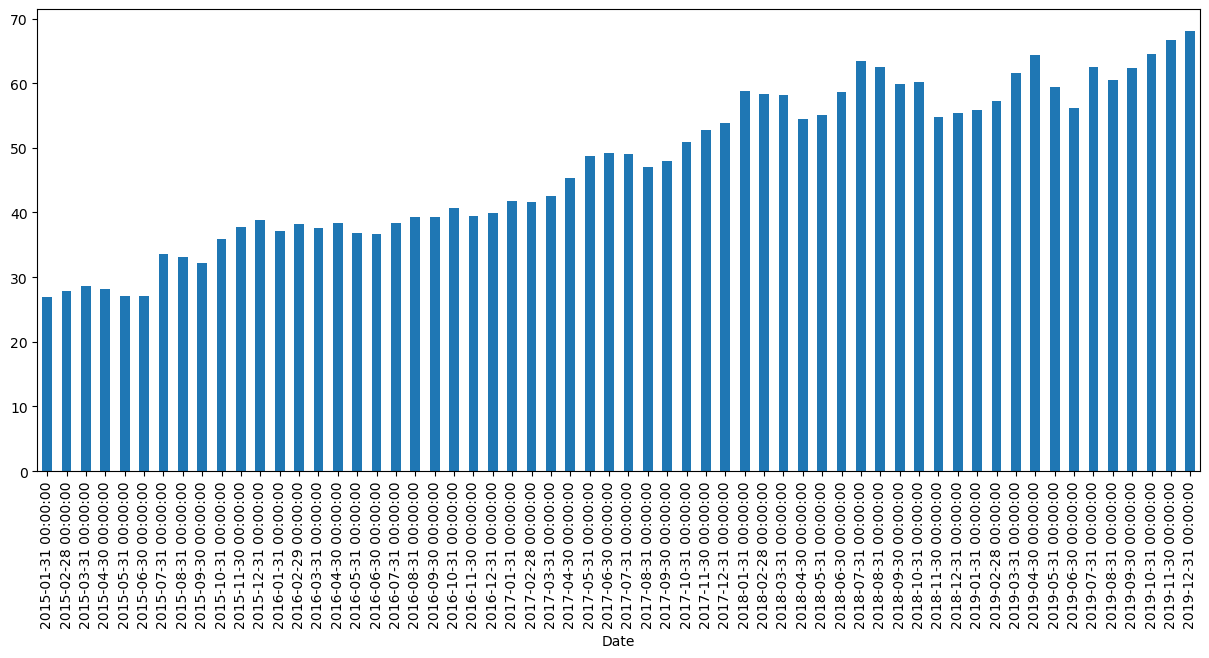

In [12]:
data.Close.resample(rule = 'M').max().plot(kind = 'bar', figsize = (15, 6))

Text(0, 0.5, 'Prices')

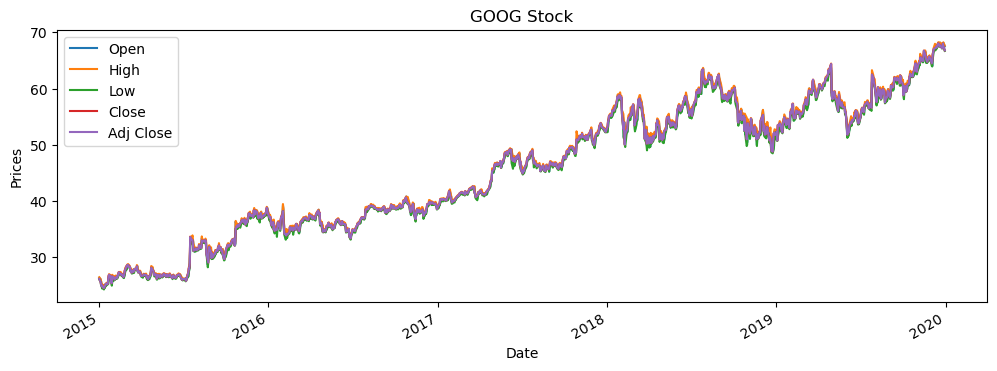

In [13]:
data.iloc[:, :-1].plot(figsize = (12, 4))
plt.title('GOOG Stock')
plt.ylabel('Prices')

<Axes: xlabel='Date'>

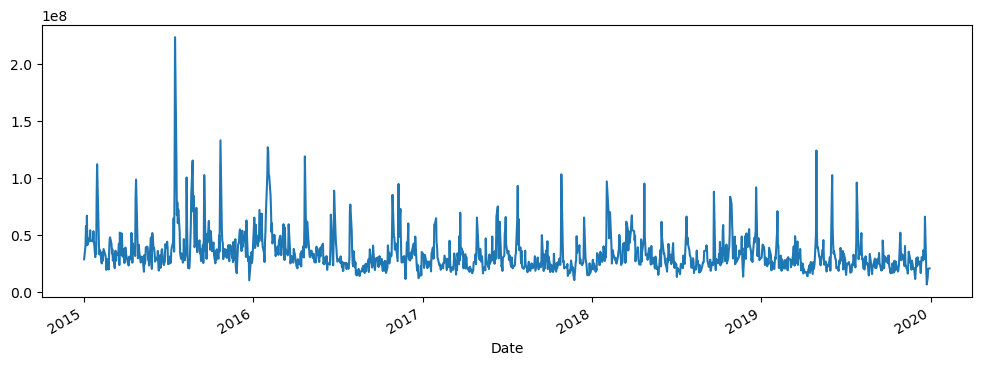

In [14]:
data.Volume.plot(figsize = (12, 4))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

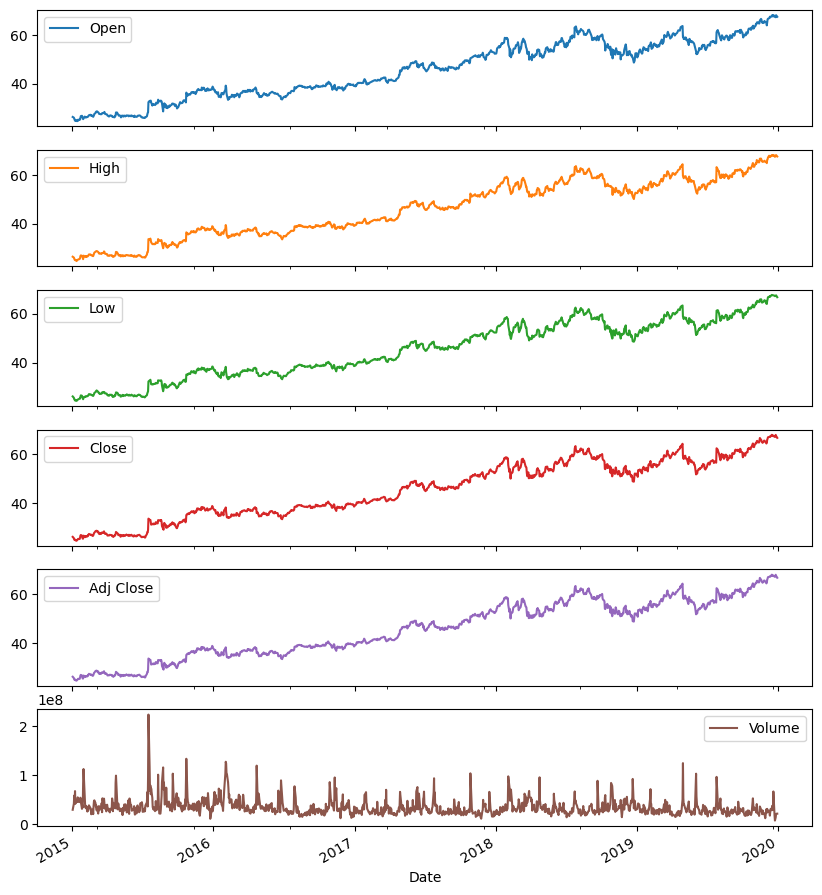

In [15]:
data.plot(subplots = True, figsize = (10, 12))

Lets look at the close value of the stock

<Axes: xlabel='Date'>

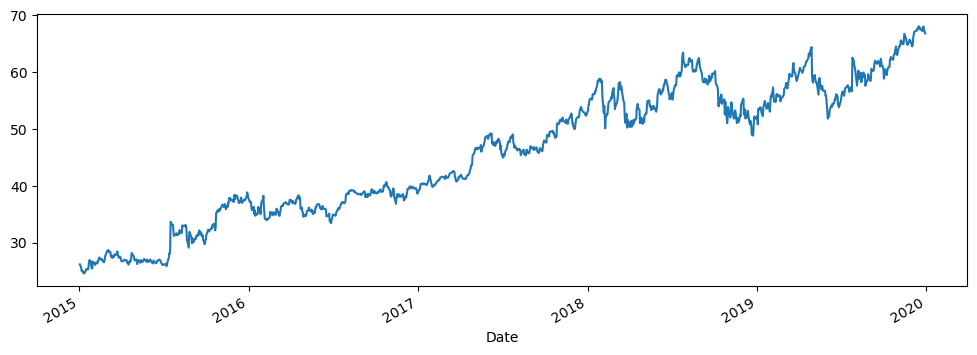

In [16]:
data.Close.plot(figsize = (12, 4))

Text(0.5, 1.0, 'Distribution of close prices over the days')

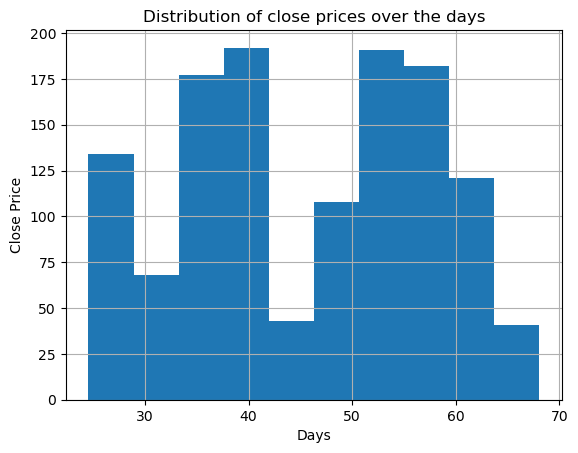

In [17]:
data.Close.hist()
plt.ylabel('Close Price')
plt.xlabel('Days')
plt.title('Distribution of close prices over the days')

In [18]:
data.Close.rolling(10).mean()

Date
2015-01-02          NaN
2015-01-05          NaN
2015-01-06          NaN
2015-01-07          NaN
2015-01-08          NaN
                ...    
2019-12-23    67.555800
2019-12-24    67.550300
2019-12-26    67.627200
2019-12-27    67.635300
2019-12-30    67.576849
Name: Close, Length: 1257, dtype: float64

### Simple Moving Average

Moving Average:
Average of the last n days

In [19]:
#Calculate moving average of first 50 days
ma20 = data.Close.rolling(20).mean()
#Calculate moving average of first 50 days
ma50 = data.Close.rolling(50).mean()
#Calculate moving average of first 100 days
ma100 = data.Close.rolling(100).mean()
#Calculate moving average of first 200 days
ma200 = data.Close.rolling(200).mean()

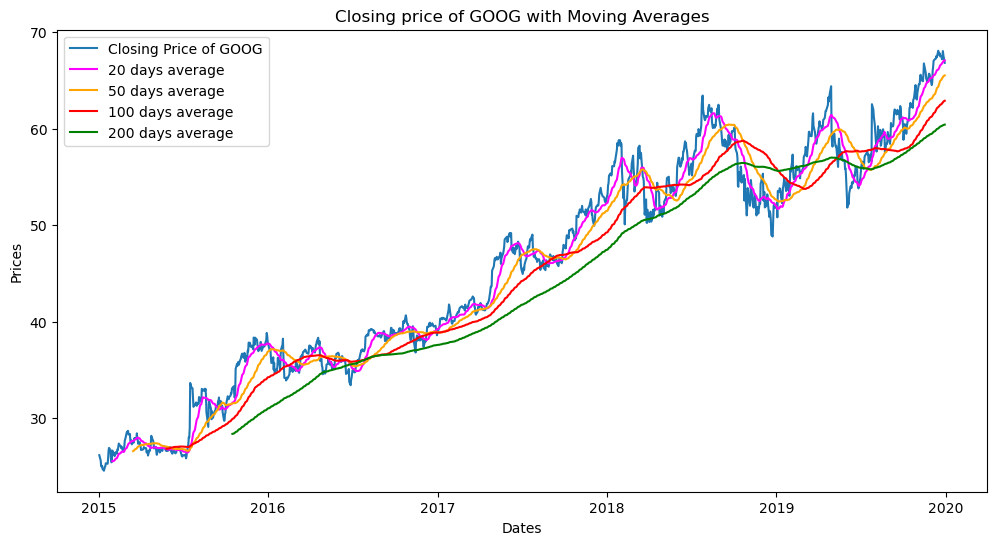

In [20]:
plt.figure(figsize = (12, 6))
plt.plot(data.Close, label = 'Closing Price of GOOG')
plt.plot(ma20, 'magenta', label = '20 days average')
plt.plot(ma50, 'orange', label = '50 days average')
plt.plot(ma100, 'r', label = '100 days average')
plt.plot(ma200, 'g', label = '200 days average')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Closing price of GOOG with Moving Averages')
plt.legend()

For 2019

In [21]:
data_2019 = pdr.get_data_yahoo(['GOOG'], start='2019-01-01', end='2019-12-31')
data_2019.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,50.828499,52.616001,50.785500,52.292500,52.292500,30652000
2019-01-03,52.049999,52.848999,50.703499,50.803001,50.803001,36822000
2019-01-04,51.629501,53.542000,51.370899,53.535500,53.535500,41878000
2019-01-07,53.575001,53.700001,52.737999,53.419498,53.419498,39638000
2019-01-08,53.805500,54.228001,53.026501,53.813999,53.813999,35298000


In [22]:
#2019
#Calculate moving average of first 50 days
ma20_2019 = data_2019.Close.rolling(20).mean()
#Calculate moving average of first 50 days
ma50_2019 = data_2019.Close.rolling(50).mean()
#Calculate moving average of first 100 days
ma100_2019 = data_2019.Close.rolling(100).mean()

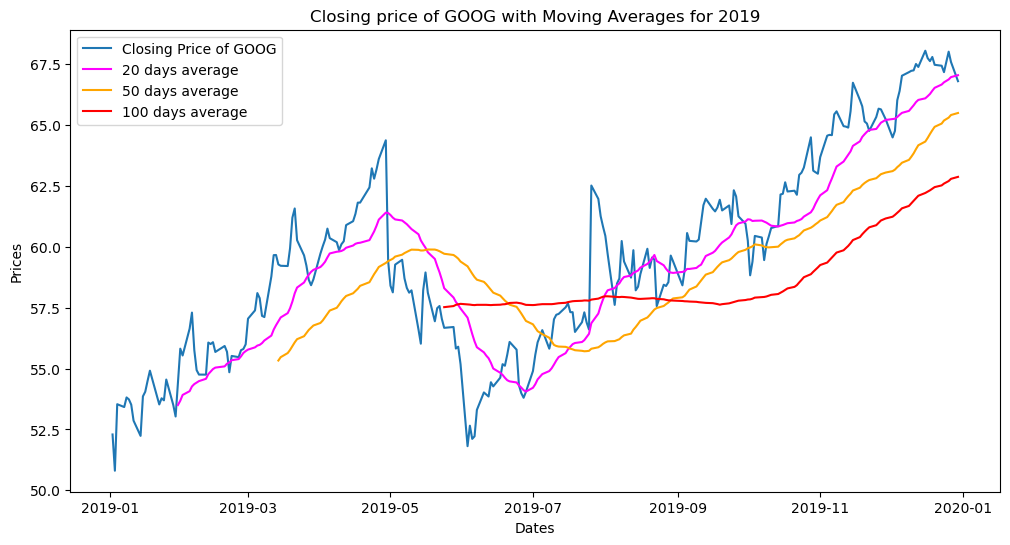

In [23]:
plt.figure(figsize = (12, 6))
plt.plot(data_2019.Close, label = 'Closing Price of GOOG')
plt.plot(ma20_2019, 'magenta', label = '20 days average')
plt.plot(ma50_2019, 'orange', label = '50 days average')
plt.plot(ma100_2019, 'r', label = '100 days average')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Closing price of GOOG with Moving Averages for 2019')
plt.legend()

### Cumulative Moving Average

In [24]:
cma_aapl = data.Close.expanding().mean()

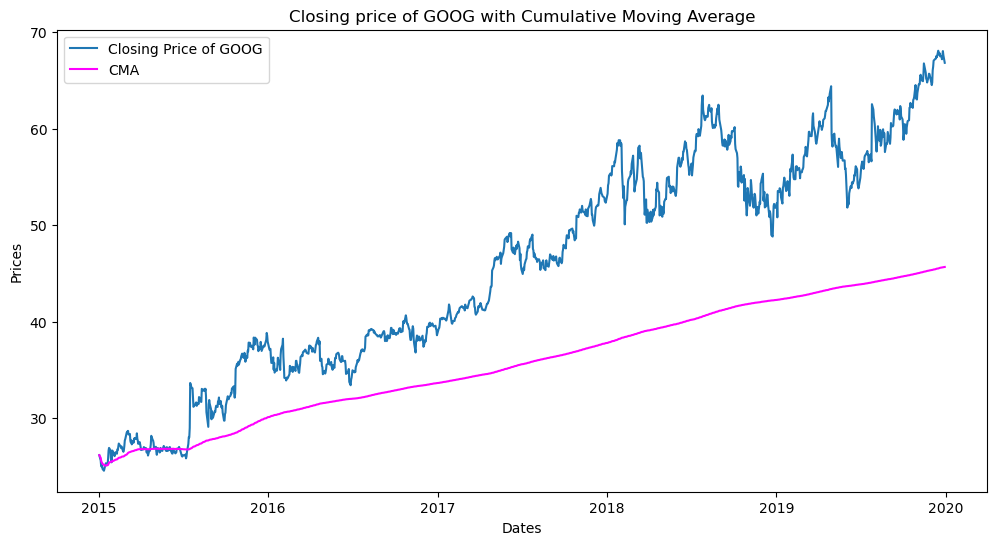

In [25]:
plt.figure(figsize = (12, 6))
plt.plot(data.Close, label = 'Closing Price of GOOG')
plt.plot(cma_aapl, 'magenta', label = 'CMA')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Closing price of GOOG with Cumulative Moving Average')
plt.legend()

In [26]:
#for 2019
cma_2019 = data_2019.Close.expanding().mean()

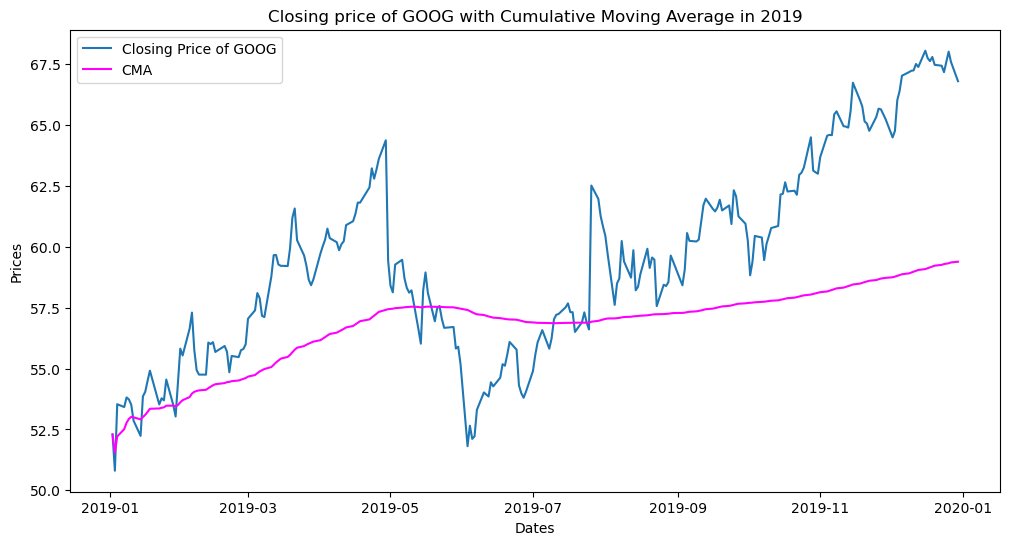

In [27]:
plt.figure(figsize = (12, 6))
plt.plot(data_2019.Close, label = 'Closing Price of GOOG')
plt.plot(cma_2019, 'magenta', label = 'CMA')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Closing price of GOOG with Cumulative Moving Average in 2019')
plt.legend()

### Exponential Weighted Moving Average (EWMA)

$ewma(t) = a * x(t) + (1-a) * ewma(t-1)$

where, $a \implies$ weight factor that gives higher priority to the price at time $t$ compared to the price at $t-1$ (This is done to prevent lags)

In [28]:
ewma_0 = data.Close.ewm(alpha = 0.1, adjust = False).mean()
ewma_1 = data.Close.ewm(alpha = 0.3, adjust = False).mean()

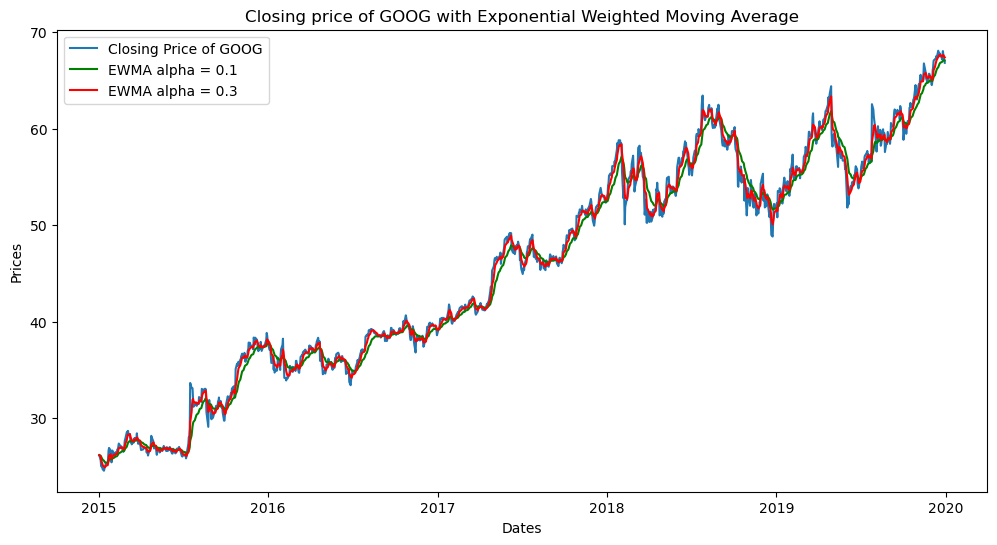

In [29]:
plt.figure(figsize = (12, 6))
plt.plot(data.Close, label = 'Closing Price of GOOG')
plt.plot(ewma_0, 'g', label = 'EWMA alpha = 0.1')
plt.plot(ewma_1, 'r', label = 'EWMA alpha = 0.3')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Closing price of GOOG with Exponential Weighted Moving Average')
plt.legend()

In [30]:
#for 2019
ewma_0_2019 = data_2019.Close.ewm(alpha = 0.1, adjust = False).mean()
ewma_1_2019 = data_2019.Close.ewm(alpha = 0.3, adjust = False).mean()

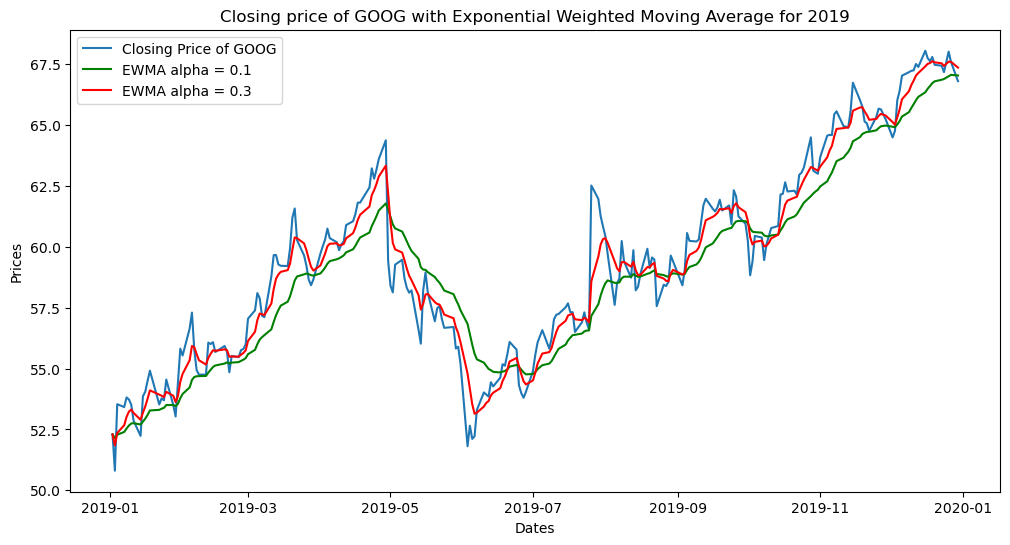

In [31]:
plt.figure(figsize = (12, 6))
plt.plot(data_2019.Close, label = 'Closing Price of GOOG')
plt.plot(ewma_0_2019, 'g', label = 'EWMA alpha = 0.1')
plt.plot(ewma_1_2019, 'r', label = 'EWMA alpha = 0.3')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Closing price of GOOG with Exponential Weighted Moving Average for 2019')
plt.legend()

### Check Trend and Seasonality

<Figure size 640x480 with 0 Axes>

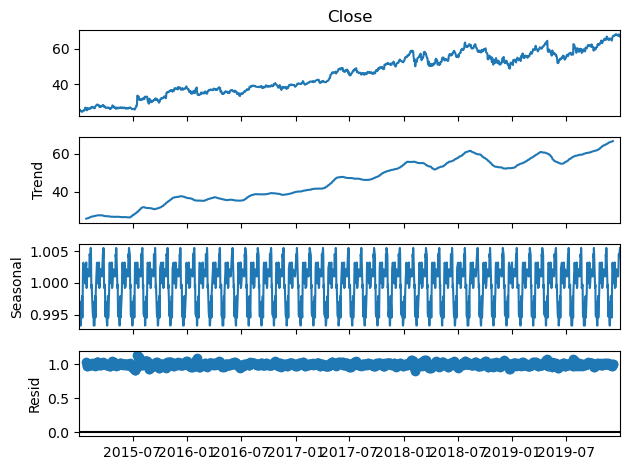

In [32]:
result = seasonal_decompose(data.Close, model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  

### To check if the data is stationary or not (Dickey-Fuller Test)

One of the most widely used statistical tests is the Dickey-Fuller test. It can be used to determine whether or not a series has a unit root, and thus whether or not the series is stationary. This test’s null and alternate hypotheses are:

Null Hypothesis: The series has a unit root (value of a =1) 

Alternate Hypothesis: The series has no unit root. 

If the null hypothesis is not rejected, the series is said to be non-stationary. The series can be linear or difference stationary as a result of this.

The series becomes stationary if both the mean and standard deviation are flat lines (constant mean and constant variance).

In [33]:
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print('Reject Null Hypothesis, The data is stationary')
    else:
        print('Fail to reject Null Hypothesis, The data is not stationary')

test_stationarity(data.Close)

ADF Statistics: -0.6726351386063085
p-value: 0.8537109098961944
Fail to reject Null Hypothesis, The data is not stationary


Assuming a 95% confidence interval, the p-value is greater than 0.05. Hence we fail to reject the null hypothesis and say that the data is non-stationary. 

We need to convert the data into stationary form.

In [34]:
#Get first differencing
data['First_differnce'] = data.Close - data.Close.shift(30)
data.head()

,Open,High,Low,Close,Adj Close,Volume,First_differnce
Date,,,,,,,
2015-01-02,26.378078,26.490770,26.133251,26.168653,26.168653,28951268,NaN
2015-01-05,26.091366,26.144720,25.582764,25.623152,25.623152,41196796,NaN
2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800,NaN
2015-01-07,25.280592,25.292759,24.914099,24.986401,24.986401,41301082,NaN
2015-01-08,24.831326,25.105074,24.482782,25.065184,25.065184,67071641,NaN


In [35]:
#Check Stationarity again
test_stationarity(data['First_differnce'].dropna())

ADF Statistics: -5.996135589528015
p-value: 1.6998770296466253e-07
Reject Null Hypothesis, The data is stationary


Thus differencing once made the data stationary. 

The number of times we do differencing is a hyperparameter to the ARIMA model that we implement later on. 

Thus d = 1

### Auto-Corellation and Partial Auto-Corellation

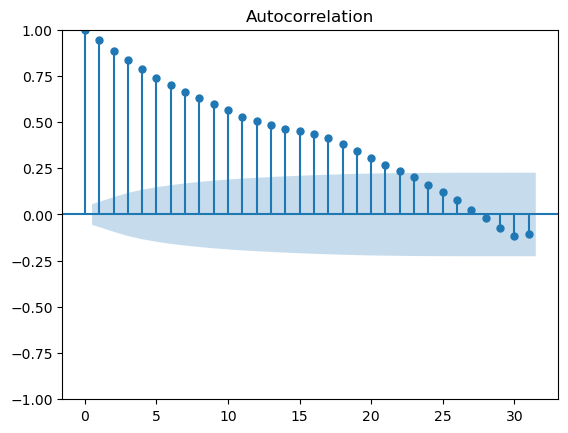

In [36]:
acf = plot_acf(data['First_differnce'].dropna())

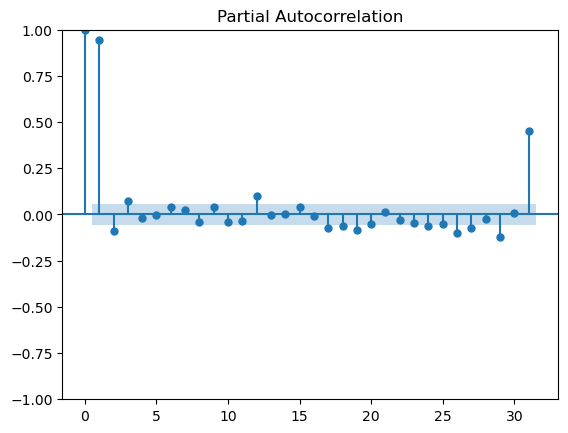

In [37]:
pacf = plot_pacf(data['First_differnce'].dropna())

### Train-Test Split

In [38]:
train_data_end = dt.datetime(2018, 12, 31)
test_data_end = dt.datetime(2019, 12, 31)
train_data = data[:train_data_end]
test_data = data[train_data_end+dt.timedelta(days=1):test_data_end]

In [39]:
train_data.dropna().head()

,Open,High,Low,Close,Adj Close,Volume,First_differnce
Date,,,,,,,
2015-02-17,27.266640,27.424706,26.980425,27.067686,27.067686,32336537,0.899033
2015-02-18,26.995884,27.199823,26.801914,26.911116,26.911116,29061570,1.287964
2015-02-19,26.828342,27.081148,26.826847,27.069181,27.069181,19782163,2.039900
2015-02-20,27.082146,27.113062,26.716648,26.873718,26.873718,28887092,1.887318
2015-02-23,26.729115,26.748512,26.398024,26.522682,26.522682,29157834,1.457499


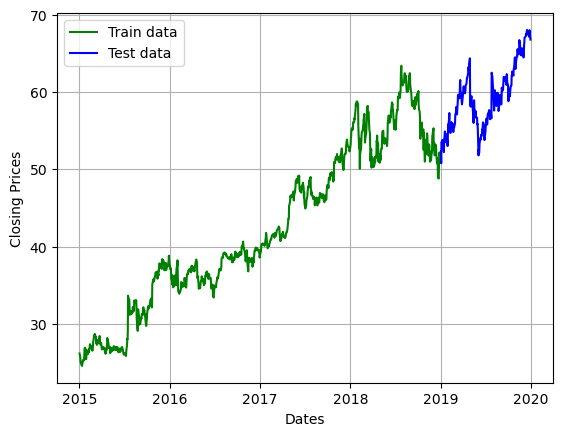

In [40]:
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data.Close, 'green', label='Train data')
plt.plot(test_data.Close, 'blue', label='Test data')
plt.legend()

### Auto-Regressive Integrated Moving Average (ARIMA)

Parameters:

p: the number of lag observations in the model; also known as the lag order.

d: the number of times that the raw observations are differenced; also known as the degree of differencing.

q: the size of the moving average window; also known as the order of the moving average.


Lets automatically discover the optimal order (hyperparameters) for the model using auto_arima library

In [41]:
model_autoARIMA = auto_arima(train_data.Close, trace = True, error_action='ignore', suppress_warnings=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1972.625, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1973.656, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1973.537, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1972.196, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.315 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1006
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -985.098
Date:                Thu, 02 Nov 2023   AIC                           1972.196
Time:                        09:53:12   BIC                           1977.109
Sample:                             0   HQIC                          1974.063
                    

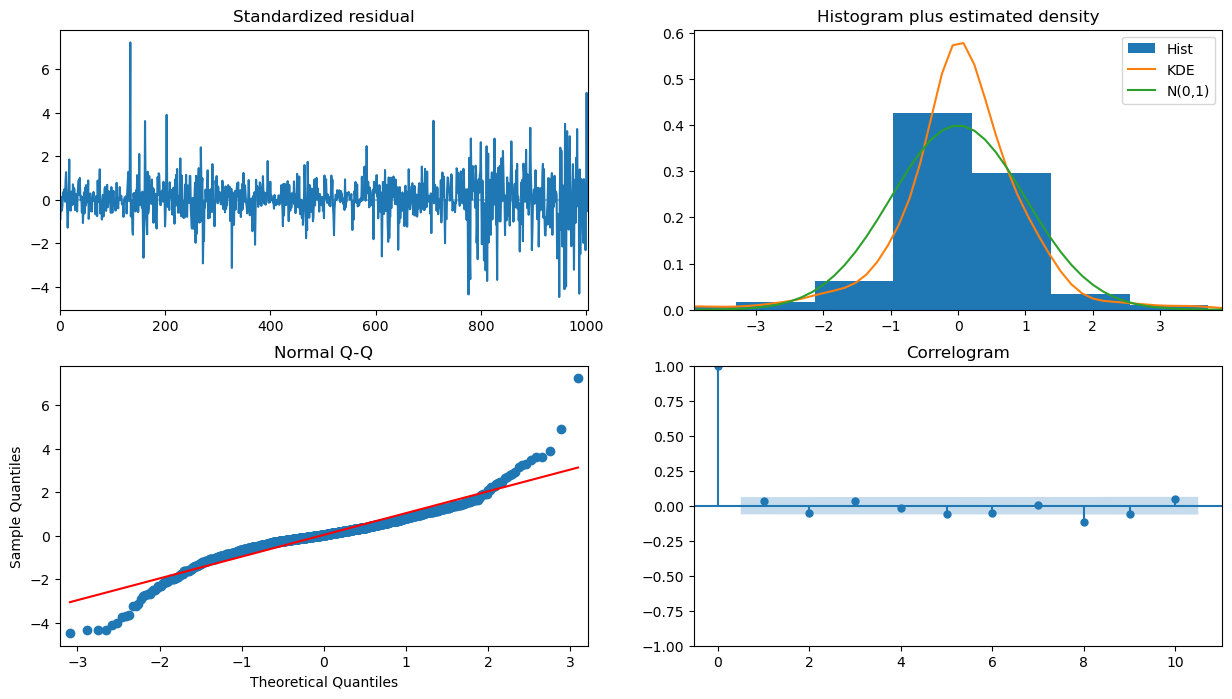

In [42]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [43]:
model_arima = ARIMA(train_data['Close'], order = (2, 1, 2))
model_fit = model_arima.fit()
model_fit.summary()


/Users/ameybasangoudar/opt/anaconda3/envs/tensorflow-gpu/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ameybasangoudar/opt/anaconda3/envs/tensorflow-gpu/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ameybasangoudar/opt/anaconda3/envs/tensorflow-gpu/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ameybasangoudar/opt/anaconda3/envs/tensorflow-gpu/lib/python3.10/site-packages/statsmodels/base/model.py:

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1006
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -971.400
Date:                Thu, 02 Nov 2023   AIC                           1952.800
Time:                        09:53:14   BIC                           1977.363
Sample:                             0   HQIC                          1962.133
                               - 1006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7825      0.004   -180.111      0.000      -0.791      -0.774
ar.L2         -0.9917      0.004   -246.959      0.000      -1.000      -0.984
ma.L1          0.8086      0.008    102.479      0.000       0.793       0.824
ma.L2          0.9993      0.017     57.607      0.000       0.965       1.033
sigma2         0.4034      0.011     35.811      0.000       0.381       0.426
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):              1315.92
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               2.28   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Predictions

For the Next 1 Year

In [44]:
results = {'Metric': ['MSE', 'MAE', 'RMSE', 'MAPE'], 'Next 1 Year': [], 'Next 1 Month': [], 'Next 10 Days': []}

In [45]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(f'Prediction Time Frame: {pred_start_date}, {pred_end_date}')
pred = model_fit.forecast(len(test_data.index), alpha=0.05)
pred = pd.DataFrame(pred)
pred.set_index(test_data.index, inplace=True)

Prediction Time Frame: 2019-01-02 00:00:00, 2019-12-30 00:00:00


/Users/ameybasangoudar/opt/anaconda3/envs/tensorflow-gpu/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ameybasangoudar/opt/anaconda3/envs/tensorflow-gpu/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/ameybasangoudar/opt/anaconda3/envs/tensorflow-gpu/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [46]:
# residuals = test_data['Close'] - pred['predicted_mean']
# residuals

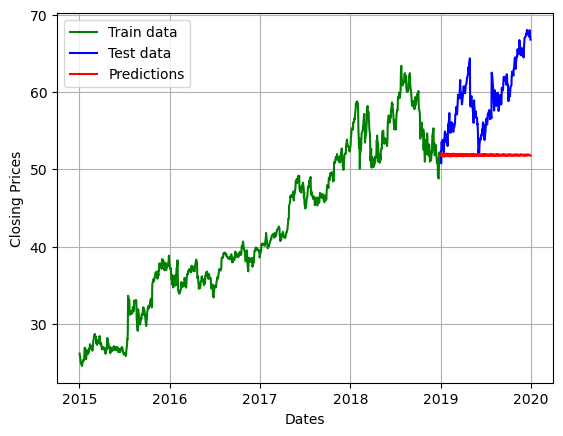

In [47]:
#Predicted Results
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data.Close, 'green', label='Train data')
plt.plot(test_data.Close, 'blue', label='Test data')
plt.plot(pred['predicted_mean'], 'red', label = 'Predictions')
plt.legend()

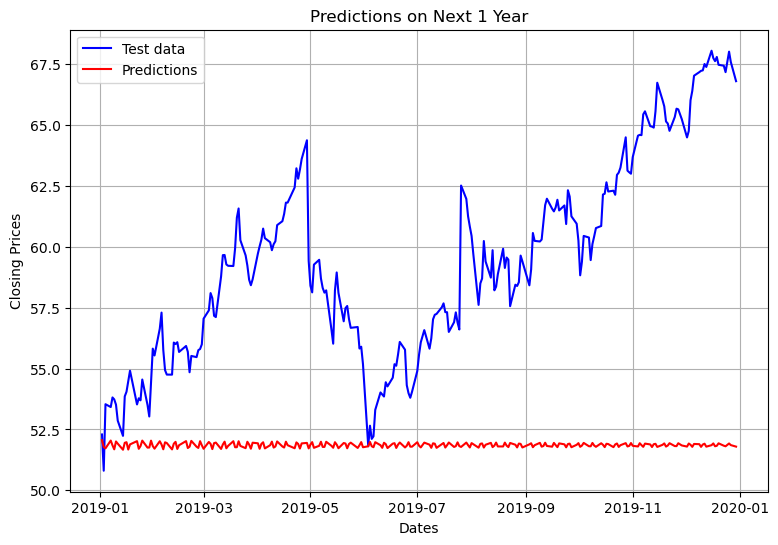

In [48]:
#Predicted Results
plt.figure(figsize = (9, 6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(test_data.Close, 'blue', label='Test data')
plt.plot(pred['predicted_mean'], 'red', label = 'Predictions')
plt.title('Predictions on Next 1 Year')
plt.legend()

In [49]:
# report performance
mse = mean_squared_error(test_data.Close, pred['predicted_mean'])
results['Next 1 Year'].append(mse)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data.Close, pred['predicted_mean'])
results['Next 1 Year'].append(mae)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data.Close, pred['predicted_mean']))
results['Next 1 Year'].append(rmse)
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(pred['predicted_mean'] - test_data.Close)/np.abs(test_data.Close))
results['Next 1 Year'].append(mape)
print('MAPE: '+str(mape))

MSE: 73.2421372840041
MAE: 7.540483312799905
RMSE: 8.558162027211456
MAPE: 0.12294430730124341


For the next 30 days

In [50]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[:30]
print(f'Prediction Time Frame: {pred_start_date}, {pred_end_date}')
pred = model_fit.forecast(len(test_data[:30].index), alpha=0.05)
pred = pd.DataFrame(pred)
pred.set_index(test_data[:30].index, inplace=True)
pred.head()

Prediction Time Frame: 2019-01-02 00:00:00, DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17',
               '2019-01-18', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-28', '2019-01-29', '2019-01-30',
               '2019-01-31', '2019-02-01', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-11',
               '2019-02-12', '2019-02-13'],
              dtype='datetime64[ns]', name='Date', freq=None)


/Users/ameybasangoudar/opt/anaconda3/envs/tensorflow-gpu/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ameybasangoudar/opt/anaconda3/envs/tensorflow-gpu/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/ameybasangoudar/opt/anaconda3/envs/tensorflow-gpu/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,predicted_mean
Date,
2019-01-02,52.056663
2019-01-03,51.776876
2019-01-04,51.721955
2019-01-07,52.042389
2019-01-08,51.846103


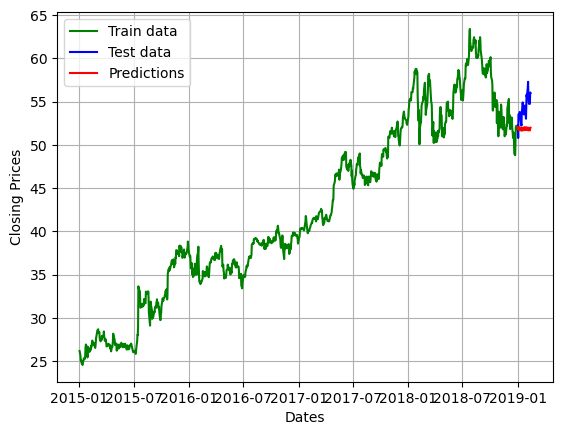

In [51]:
#Predicted Results
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data.Close, 'green', label='Train data')
plt.plot(test_data[:30].Close, 'blue', label='Test data')
plt.plot(pred['predicted_mean'], 'red', label = 'Predictions')
plt.legend()

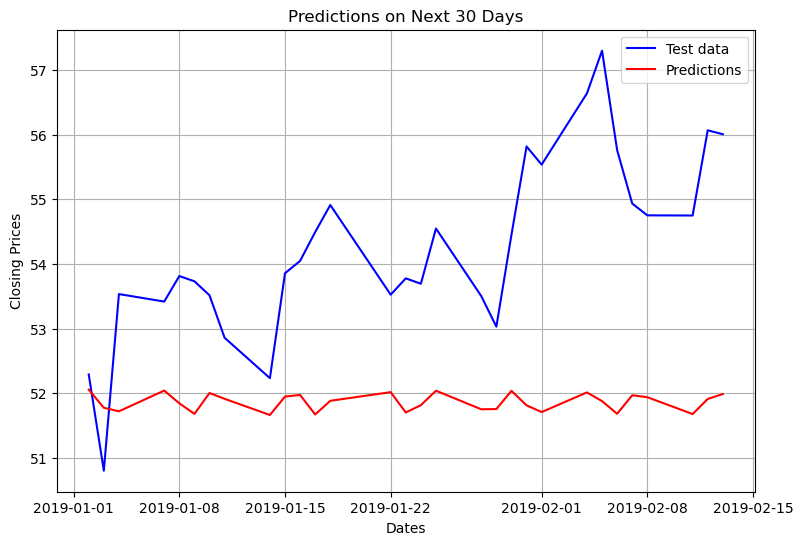

In [52]:
#Predicted Results
plt.figure(figsize = (9, 6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(test_data[:30].Close, 'blue', label='Test data')
plt.plot(pred['predicted_mean'], 'red', label = 'Predictions')
plt.title('Predictions on Next 30 Days')
plt.legend()

In [53]:
# report performance
mse = mean_squared_error(test_data[:30].Close, pred['predicted_mean'])
results['Next 1 Month'].append(mse)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data[:30].Close, pred['predicted_mean'])
results['Next 1 Month'].append(mae)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data[:30].Close, pred['predicted_mean']))
results['Next 1 Month'].append(rmse)
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(pred['predicted_mean'] - test_data[:30].Close)/np.abs(test_data[:30].Close))
results['Next 1 Month'].append(mape)
print('MAPE: '+str(mape))

MSE: 7.579709555934647
MAE: 2.4554174452613675
RMSE: 2.7531272320644113
MAPE: 0.04473138813368063


For 10 Days

In [54]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[:10]
print(f'Prediction Time Frame: {pred_start_date}, {pred_end_date}')
pred = model_fit.forecast(len(test_data[:10].index), alpha=0.05)
pred = pd.DataFrame(pred)
pred.set_index(test_data[:10].index, inplace=True)
pred.head()

Prediction Time Frame: 2019-01-02 00:00:00, DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15'],
              dtype='datetime64[ns]', name='Date', freq=None)


/Users/ameybasangoudar/opt/anaconda3/envs/tensorflow-gpu/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ameybasangoudar/opt/anaconda3/envs/tensorflow-gpu/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/ameybasangoudar/opt/anaconda3/envs/tensorflow-gpu/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,predicted_mean
Date,
2019-01-02,52.056663
2019-01-03,51.776876
2019-01-04,51.721955
2019-01-07,52.042389
2019-01-08,51.846103


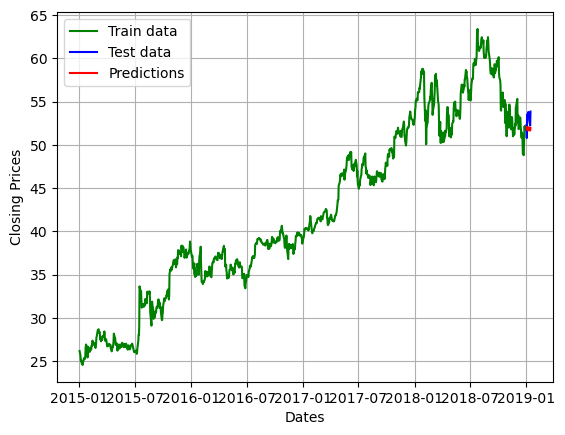

In [55]:
#Predicted Results
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data.Close, 'green', label='Train data')
plt.plot(test_data[:10].Close, 'blue', label='Test data')
plt.plot(pred['predicted_mean'], 'red', label = 'Predictions')
plt.legend()

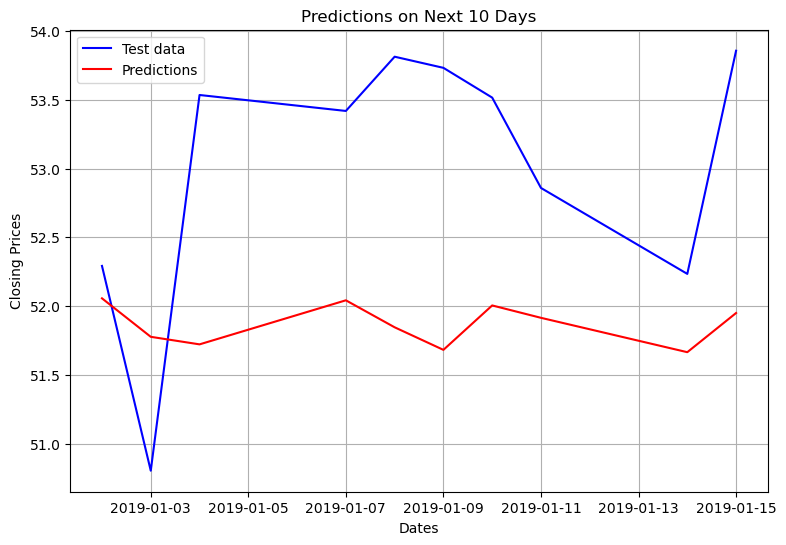

In [56]:
#Predicted Results
plt.figure(figsize = (9, 6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(test_data[:10].Close, 'blue', label='Test data')
plt.plot(pred['predicted_mean'], 'red', label = 'Predictions')
plt.title('Predictions on Next 10 Days')
plt.legend()

In [57]:
# report performance
mse = mean_squared_error(test_data[:10].Close, pred['predicted_mean'])
results['Next 10 Days'].append(mse)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data[:10].Close, pred['predicted_mean'])
results['Next 10 Days'].append(mae)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data[:10].Close, pred['predicted_mean']))
results['Next 10 Days'].append(rmse)
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(pred['predicted_mean'] - test_data[:10].Close)/np.abs(test_data[:10].Close))
results['Next 10 Days'].append(mape)
print('MAPE: '+str(mape))

MSE: 2.1408487039854975
MAE: 1.3352277064879012
RMSE: 1.4631639361279711
MAPE: 0.025050527673860214


In [58]:
df_results = pd.DataFrame(results)
df_results.set_index('Metric',  inplace=True)
df_results = df_results.apply(lambda x: round(x, 2))
df_results

,Next 1 Year,Next 1 Month,Next 10 Days
Metric,,,
MSE,73.24,7.58,2.14
MAE,7.54,2.46,1.34
RMSE,8.56,2.75,1.46
MAPE,0.12,0.04,0.03


### VARMA (Vector Auto-Regressive Moving Average)

Lets check what variables will suit us for the modelling. check for stationarity

### Augmented Dickey Fuller Test

In [68]:
data = data.iloc[:, :-1]

In [75]:
def check_stationarity(data):
    for i in range(len(data.columns)):
        scores = adfuller(data[data.columns[i]], autolag='AIC')
        if scores[1] < 0.05:
            print(f'Data is stationary for column {data.columns[i]}')
        else:
            print(f'Data is not stationary for column {data.columns[i]}')

def apply_differencing(data, column):
    data[f'First_differnce_{column}'] = data[column] - data[column].shift(30)
    return data

In [76]:
check_stationarity(data)

Data is not stationary for column Open
Data is not stationary for column High
Data is not stationary for column Low
Data is not stationary for column Close
Data is not stationary for column Adj Close
Data is stationary for column Volume


In [77]:
for i in data.columns:
    if i == 'Volume':
        continue
    data = apply_differencing(data, i)



In [91]:
stationary_data = data.iloc[30:, -6:]
check_stationarity(stationary_data)

Data is stationary for column Volume
Data is stationary for column First_differnce_Open
Data is stationary for column First_differnce_High
Data is stationary for column First_differnce_Low
Data is stationary for column First_differnce_Close
Data is stationary for column First_differnce_Adj Close


### Granger Causality Test

Checks if a given time-series variable effects the target 'Close'

H0: The column does'nt effect the target

H1: The column effects the target.

In [97]:
stationary_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1227 entries, 2015-02-17 to 2019-12-30
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Volume                     1227 non-null   int64  
 1   First_differnce_Open       1227 non-null   float64
 2   First_differnce_High       1227 non-null   float64
 3   First_differnce_Low        1227 non-null   float64
 4   First_differnce_Close      1227 non-null   float64
 5   First_differnce_Adj Close  1227 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 67.1 KB


In [98]:
def grangers_test(data, columns, test = 'ssr_chi2test'):
    df = pd.DataFrame(np.zeros((len(columns), len(columns))), columns = columns, index = columns)
    for c in df.columns:
        for r in df.index:
            res = grangercausalitytests(data[[r, c]], maxlag=12, verbose=False)
            p_vals = [round(res[i+1][0][test][1], 4) for i in range(12)]
            min_p_value = np.min(p_vals)
            df.loc[r, c] = min_p_value

    df.columns = [col + '_x' for col in columns]
    df.index = [col + '_y' for col in columns]
    return df

granger_df = grangers_test(stationary_data, stationary_data.columns)
granger_df

/Users/ameybasangoudar/opt/anaconda3/envs/tensorflow-gpu/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/ameybasangoudar/opt/anaconda3/envs/tensorflow-gpu/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/ameybasangoudar/opt/anaconda3/envs/tensorflow-gpu/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/ameybasangoudar/opt/anaconda3/envs/tensorflow-gpu/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/ameybasangoudar/opt/anaconda3/envs/tensorflow-gpu/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: 

,Volume_x,First_differnce_Open_x,First_differnce_High_x,First_differnce_Low_x,First_differnce_Close_x,First_differnce_Adj Close_x
Volume_y,1.0000,0.2068,0.1109,0.0249,0.0565,0.0565
First_differnce_Open_y,0.0035,1.0000,0.0000,0.0000,0.0000,0.0000
First_differnce_High_y,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
First_differnce_Low_y,0.0166,0.0000,0.0000,1.0000,0.0000,0.0000
First_differnce_Close_y,0.0196,0.0000,0.0003,0.0000,1.0000,1.0000
First_differnce_Adj Close_y,0.0196,0.0000,0.0003,0.0000,1.0000,1.0000


In [103]:
granger_df[['First_differnce_Close_x']]

,First_differnce_Close_x
Volume_y,0.0565
First_differnce_Open_y,0.0000
First_differnce_High_y,0.0000
First_differnce_Low_y,0.0000
First_differnce_Close_y,1.0000
First_differnce_Adj Close_y,1.0000


For a variable to have an effect on the target the p-value should be less that 0.05 for a 95% confidence interval.
Hence the variables that effect the Close price are Open, High and Low.

Split into Test and Train sets

In [108]:
final_data = stationary_data.iloc[:, 1:5]

In [109]:
train_data_end = dt.datetime(2018, 12, 31)
test_data_end = dt.datetime(2019, 12, 31)
train_data = final_data[:train_data_end]
test_data = final_data[train_data_end+dt.timedelta(days=1):test_data_end]

In [110]:
train_data.head()

,First_differnce_Open,First_differnce_High,First_differnce_Low,First_differnce_Close
Date,,,,
2015-02-17,0.888561,0.933935,0.847174,0.899033
2015-02-18,0.904518,1.055103,1.219151,1.287964
2015-02-19,1.148846,1.343061,1.842939,2.039900
2015-02-20,1.801554,1.820303,1.802549,1.887318
2015-02-23,1.897789,1.643438,1.915241,1.457499


Source:
- https://www.youtube.com/watch?v=s3CnE2tqQdo&t=365s
- https://www.youtube.com/watch?v=N9NqTp_D_bw